# Logistic Regression From Scratch

## Required Libraries

In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Reading and Checking

In [142]:
# Read the CSV file
df = pd.read_csv("realistic_logistic_data_int_fresh.csv")
# Display the first 5 rows
print(df.head())

# Show dataset info
print(df.info())

   age  income  bought_insurance
0   46   61313               1.0
1   26   30734               0.0
2   47   69284               1.0
3   26   28242               0.0
4   34   89385               1.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               100 non-null    int64  
 1   income            100 non-null    int64  
 2   bought_insurance  100 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 2.5 KB
None


## Since the target label is binary, logistic regression is an appropriate model. Let's visualize the data to better understand the relationship between features and the outcome.

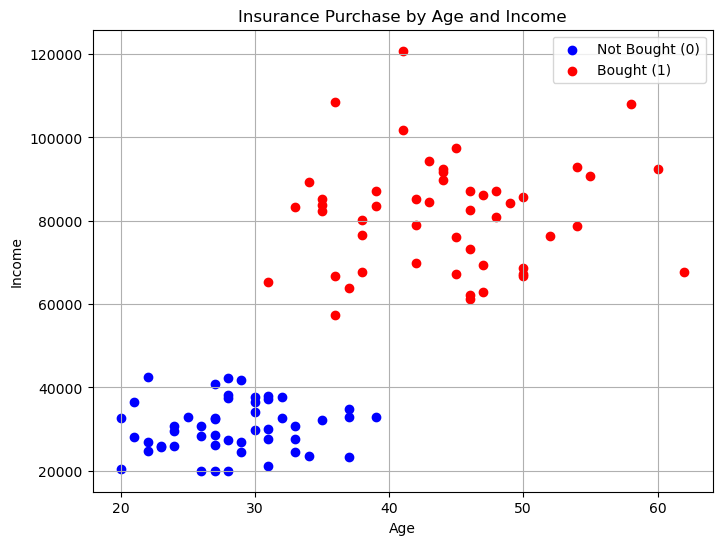

In [144]:
# Separate the two classes
class_0 = df[df["bought_insurance"] == 0]
class_1 = df[df["bought_insurance"] == 1]

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(class_0["age"], class_0["income"], color="blue", label="Not Bought (0)")
plt.scatter(class_1["age"], class_1["income"], color="red", label="Bought (1)")
plt.xlabel("Age")
plt.ylabel("Income")
plt.title("Insurance Purchase by Age and Income")
plt.legend()
plt.grid(True)
plt.show()

## Lets write the function

## Sigmoid Function:
### This function applies the sigmoid transformation to its input. It maps any real-valued number to a value between 0 and 1, which allows us to interpret the output as a probability.

In [147]:
def sigmoid(z):
    z = np.clip(z, -500, 500)  # prevent overflow
    return 1 / (1 + np.exp(-z))

## Predict Function: 
### This function calculates the predicted probabilities using the logistic regression hypothesis.

In [149]:
def predict(X, weights):
    z = np.dot(X, weights)
    return sigmoid(z)

## Compute_loss Function:
### This function computes the loss between the predicted probabilities and the true labels.

In [151]:
def compute_loss(y, y_pred):
    m = y.shape[0]
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    
    loss = - (1 / m) * np.sum(
        y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)
    )
    return loss

## Update_weights Function:
### This function updates the weights of the logistic regression model using one step of gradient descent.

In [153]:
def update_weights(X, y, weights, learning_rate):
    m = X.shape[0]
    y_pred = predict(X, weights)
    gradient = (1 / m) * np.dot(X.T, (y_pred - y))
    weights -= learning_rate * gradient
    return weights

## Train Funciton:
### This function trains the logistic regression model over multiple epochs.

In [155]:
def train(X, y, epochs, learning_rate):
    weights = np.zeros((X.shape[1], 1))
    
    for epoch in range(epochs):
        y_pred = predict(X, weights)
        loss = compute_loss(y, y_pred)
        weights = update_weights(X, y, weights, learning_rate)
        
        # Print loss every 100 iterations
        if (epoch + 1) % 100 == 0 or epoch == 0:
            print(f"Epoch {epoch + 1}/{epochs} - Loss: {loss:.4f}")
    
    return weights

## Compute_accuracy Function:
### This function calculates the accuracy of the logistic regression model.


In [157]:
def compute_accuracy(y_true, y_pred_probs, threshold=0.5):
    y_pred_labels = (y_pred_probs >= threshold).astype(int)
    accuracy = np.mean(y_pred_labels == y_true)
    return accuracy


## Lets Train the model

In [159]:
# Features and labels
X_raw = df[["age", "income"]].values
y = df["bought_insurance"].values.reshape(-1, 1)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)

# Add bias term (intercept)
X_scaled = np.hstack((np.ones((X_scaled.shape[0], 1)), X_scaled))

# Train the model again
weights = train(X_scaled, y, epochs=1000, learning_rate=0.01)

Epoch 1/1000 - Loss: 0.6931
Epoch 100/1000 - Loss: 0.4418
Epoch 200/1000 - Loss: 0.3217
Epoch 300/1000 - Loss: 0.2550
Epoch 400/1000 - Loss: 0.2129
Epoch 500/1000 - Loss: 0.1839
Epoch 600/1000 - Loss: 0.1628
Epoch 700/1000 - Loss: 0.1466
Epoch 800/1000 - Loss: 0.1339
Epoch 900/1000 - Loss: 0.1235
Epoch 1000/1000 - Loss: 0.1149


In [172]:
y_pred_probs = predict(X_scaled, weights)
acc = compute_accuracy(y, y_pred_probs)
print(f"Our Logistic Regression Accuracy: {acc:.4f}")

Our Logistic Regression Accuracy: 0.9900


## Lets try scikitlearn

In [180]:
# Create and train the model
model = LogisticRegression()
model.fit(X_raw, y.ravel())  # Use unscaled features, sklearn handles it internally

# Make predictions
y_pred_sklearn = model.predict(X_raw)

# Evaluate accuracy
acc_sklearn = accuracy_score(y, y_pred_sklearn)
print(f"Scikit-learn Logistic Regression Accuracy: {acc_sklearn:.4f}")

Scikit-learn Logistic Regression Accuracy: 1.0000


## Almost Close as Scikitlearn!!